In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import statsmodels.api as sm
from sklearn import tree #decision tree package
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import scipy.stats
import pylab
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from xgboost import XGBClassifier 

#### Loading the dataset as dataframe using pandas

In [3]:
df=pd.read_csv('aw_fb_data.csv')

In [4]:
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


### Data wrangling

#### Checking for null values

In [5]:
print(df.isnull().sum())

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


#### Dropping unwanted columns and correcting coulmn names to meaningful headers

In [6]:
df.drop(['Unnamed: 0','X1'],inplace = True , axis =1 )
df.rename({'hear_rate':'heart_rate'},inplace = True, axis =1 )
df.rename({'entropy_setps':'entropy_steps'},inplace = True, axis =1 )
df.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [7]:
df.shape

(6264, 18)

#### Statistical Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   heart_rate            6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_steps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

##### Statistical summary

In [10]:
df.describe()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


####  Target class distribution 

In [11]:
df['activity'].value_counts()

Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: activity, dtype: int64

In [12]:
df.activity=df.activity.map({'Sitting':'Sitting','Self Pace walk':'Walking','Lying':'Lying','Running 3 METs':'Running',
       'Running 5 METs':'Running', 'Running 7 METs':'Running'})

In [13]:
df_fb['activity'].value_counts()

NameError: name 'df_fb' is not defined

In [14]:
labels = ['Running','Lying', 'Sitting', 'Walking']
values = df_fb['activity'].value_counts()
colors = ['red', 'orange','green','royalblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels)
ax1.axis('equal')  
plt.show()

NameError: name 'df_fb' is not defined

#### Label Encoding our target variable

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['activity'] = labelencoder.fit_transform(df['activity'])
df

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,1
6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,1
6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,1
6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,1


### Filtering only Apple watch data

In [16]:
df_apple_watch = df.groupby(df.device).get_group("apple watch")
df_apple_watch=df_apple_watch.drop('device',axis=1)
df_apple_watch.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0


### Filtering only Fitbit data

In [17]:
df_fb=df[df['device']=='fitbit']
df_fb=df_fb.drop('device',axis=1)
df_fb.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,0
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,0
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,0
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,0
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,3


In [18]:
df_fb['activity'].value_counts()

1    1278
0     592
2     378
3     360
Name: activity, dtype: int64

In [19]:
df_apple_watch['activity'].value_counts()

1    1788
0     787
2     552
3     529
Name: activity, dtype: int64

In [20]:
### 1 ->    1278 ->  Running
### 0 ->    592 ->   Lying
### 2 ->    378 ->   Sitting
### 3 ->    360 ->   Walking



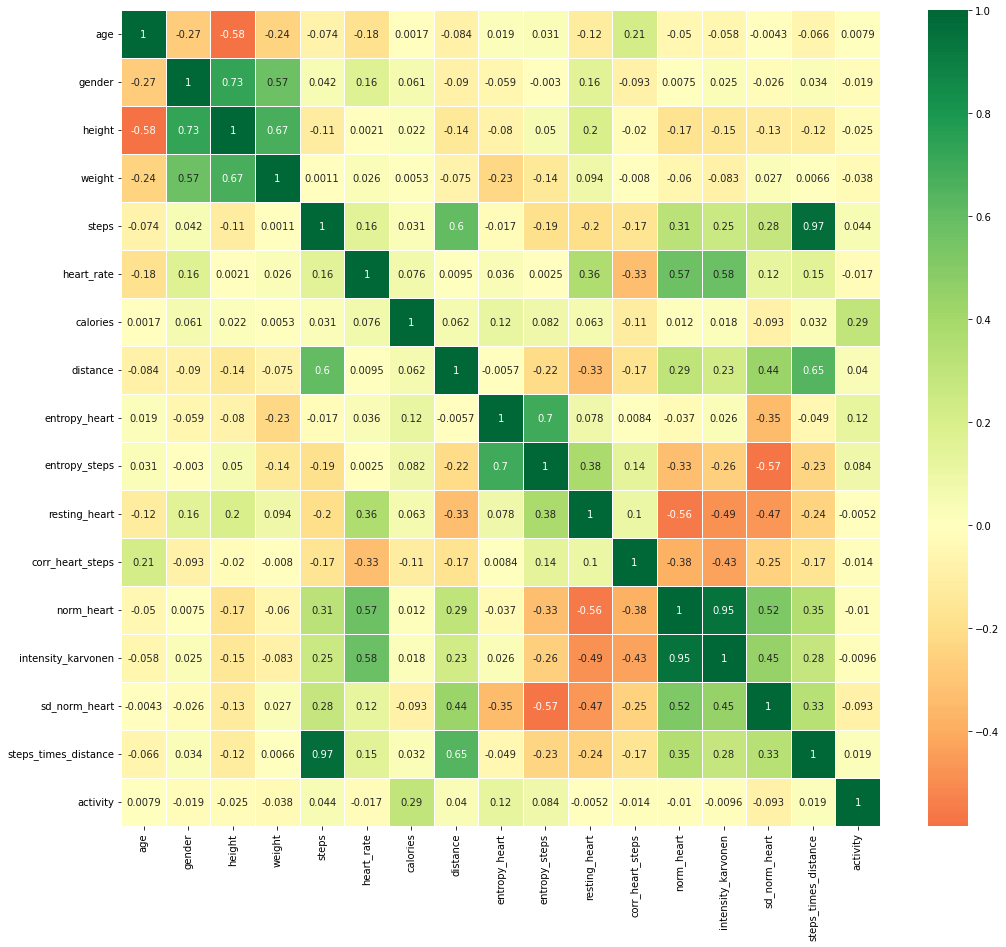

In [21]:
ax1 = plt.subplots(figsize=(17, 15))
ax1 = sns.heatmap(df_fb.corr(),linewidths=0.5,center=0,annot=True,cmap="RdYlGn")

In [22]:
#### Identified Features that are correlated to activity using correlation plot - fot fitbit

# 1- calories
# 2- entropy_heart
# 3- entropy_steps
# 4- steps/distance
# 5- steps-times_distance
# 6- norm_heart
# 7- age

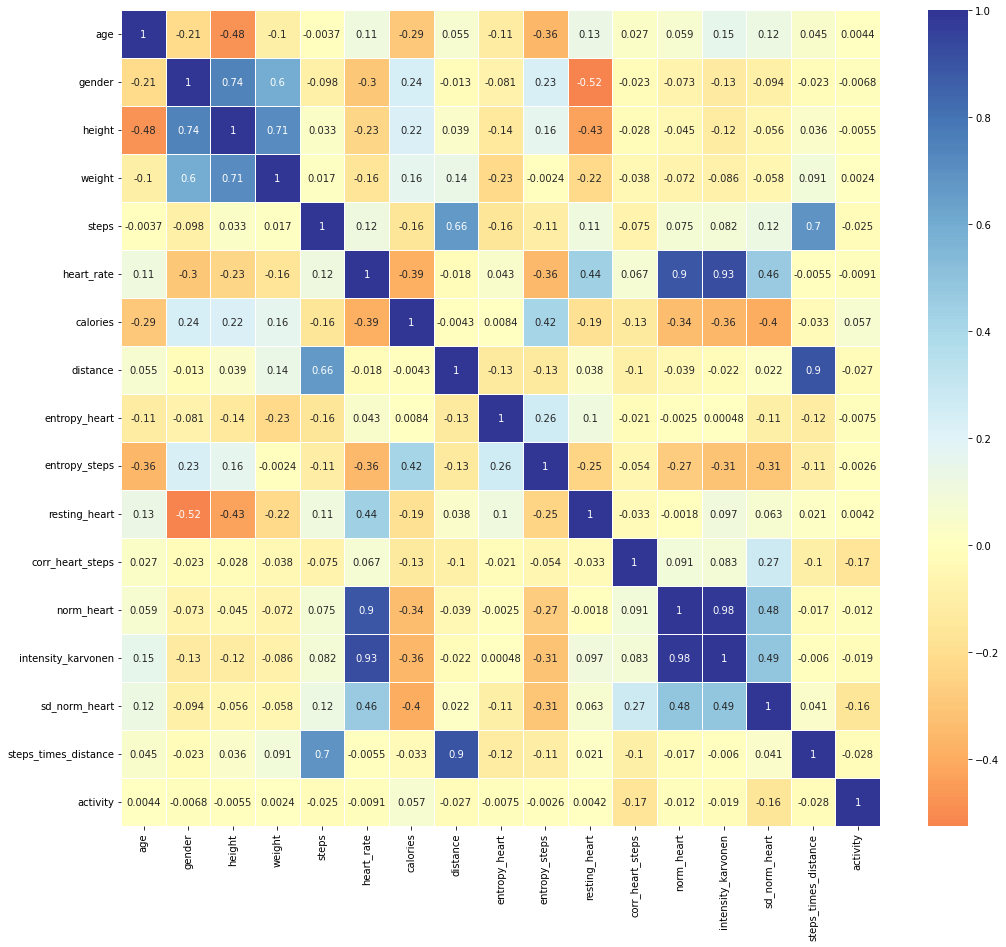

In [23]:
ax2 = plt.subplots(figsize=(17, 15))
ax2 = sns.heatmap(df_apple_watch.corr(),linewidths=0.5,center=0,annot=True,cmap="RdYlBu")


In [24]:
#### Identified Features that are correlated to apple_watch activity using correlation plot

# 1 - corr_heart_steps  
# 2- sd_norm_heart   
# 3- calories   
# 4- steps_times_distance    
# 5- distance    
# 6- steps    
# 7-intensity_karvonen


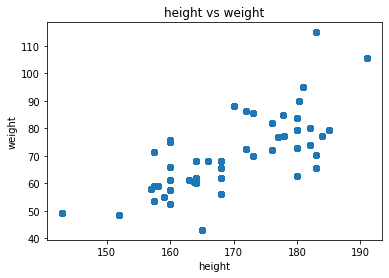

In [25]:
##### Scatterplots Fitbit ######

# Just like in the slides, we can produce a scatterplot with colours.
plt.scatter(x=df_fb['height'],y=df_fb['weight'])
plt.title('height vs weight') # Title label
plt.xlabel('height') # Title label
plt.ylabel('weight') # Title label
plt.show()
plt.close()

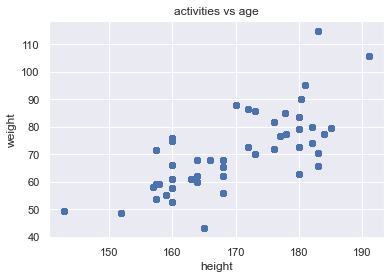

In [98]:
##### Scatterplots apple watch ######

# Just like in the slides, we can produce a scatterplot with colours.
plt.scatter(x=df_apple_watch['height'],y=df_apple_watch['weight'])
plt.title('activities vs age') # Title label
plt.xlabel('height') # Title label
plt.ylabel('weight') # Title label
plt.show()
plt.close()

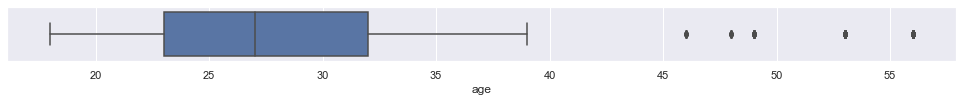

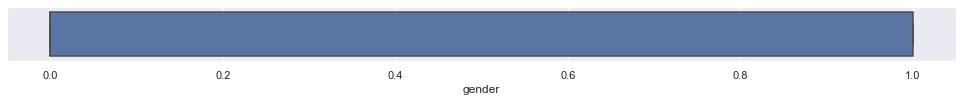

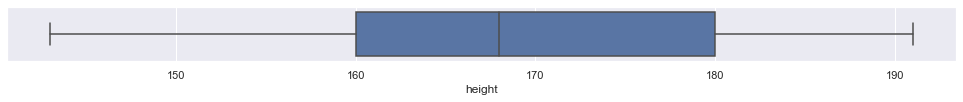

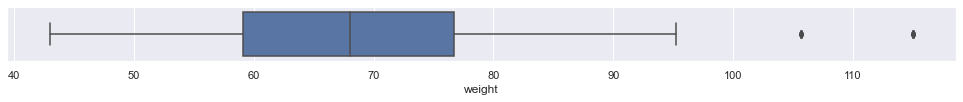

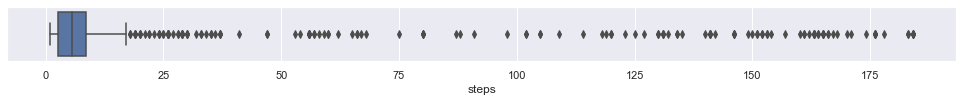

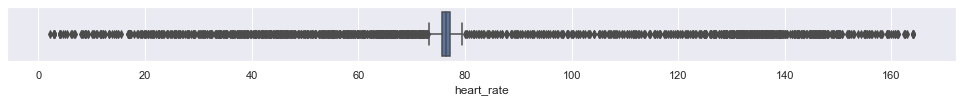

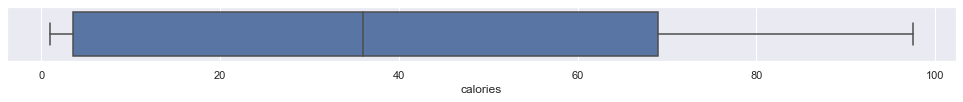

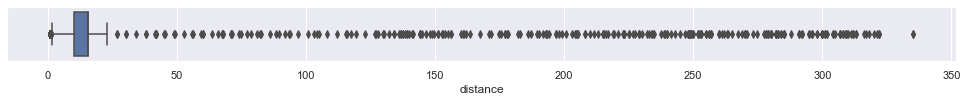

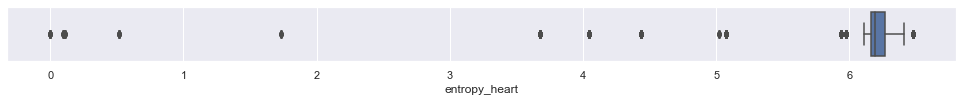

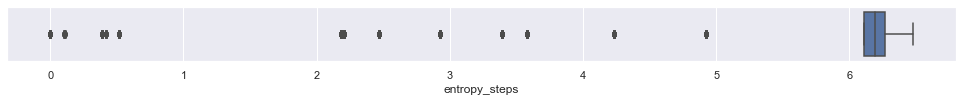

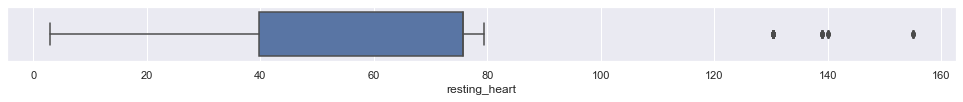

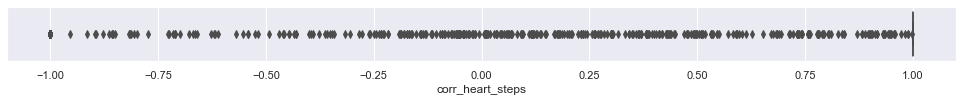

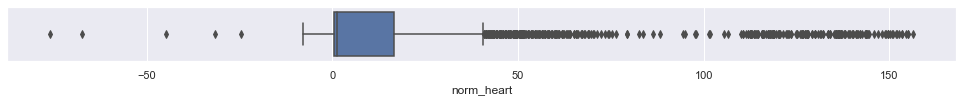

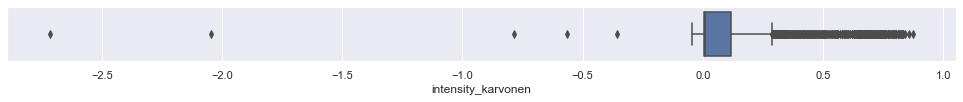

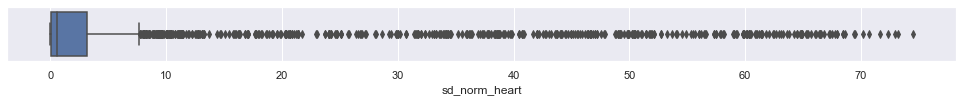

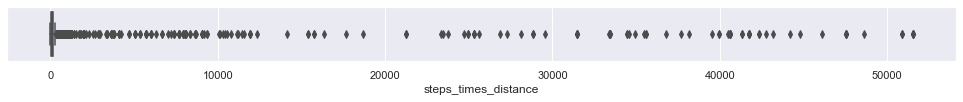

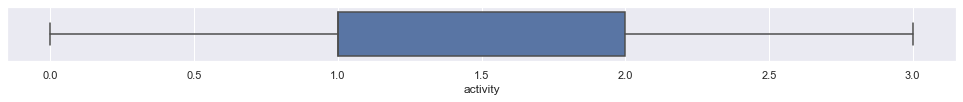

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df_fb:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_fb, x=column)

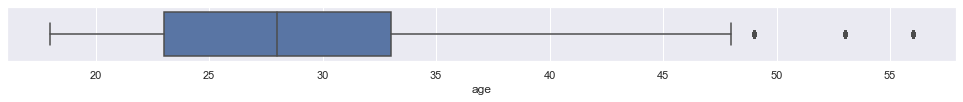

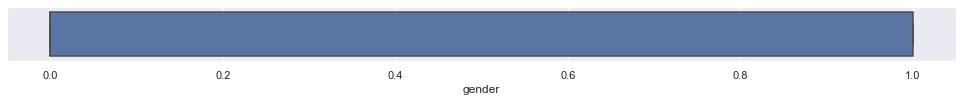

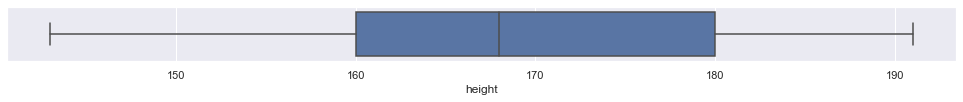

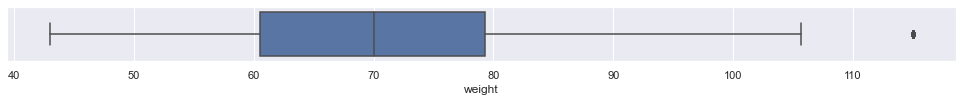

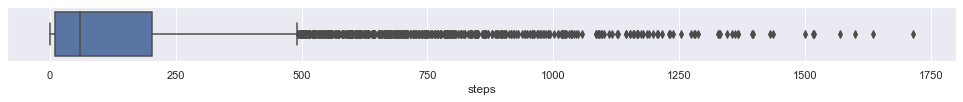

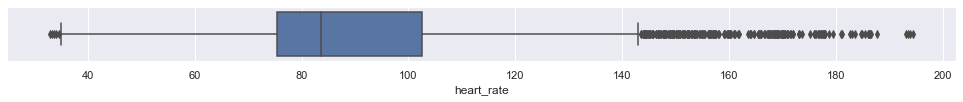

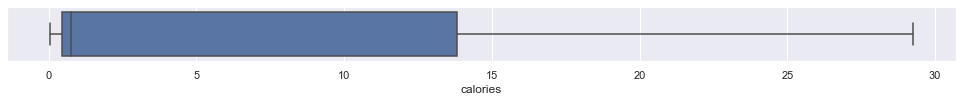

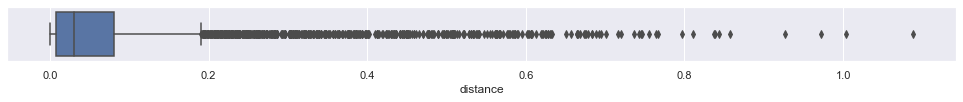

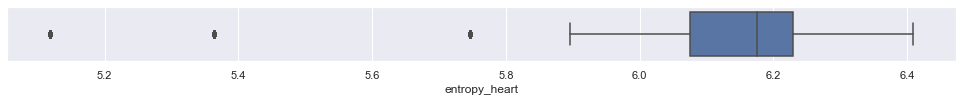

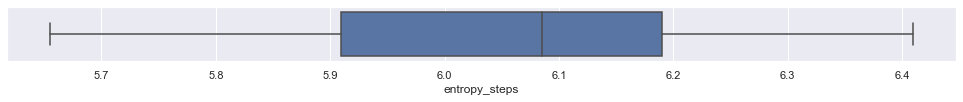

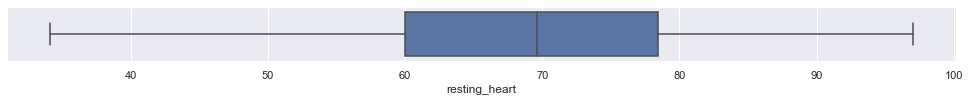

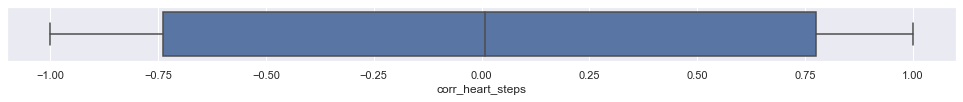

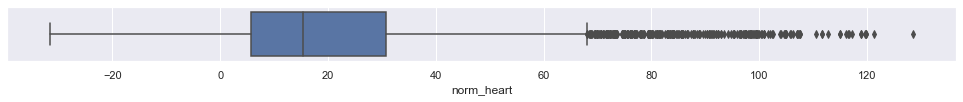

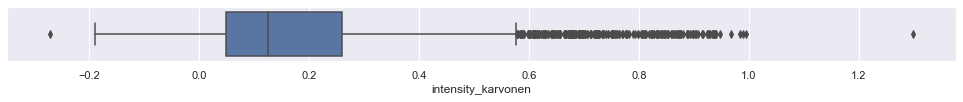

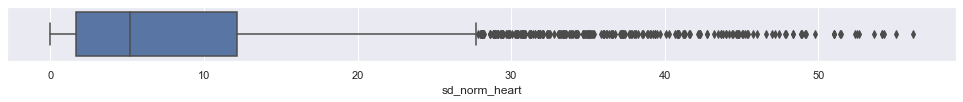

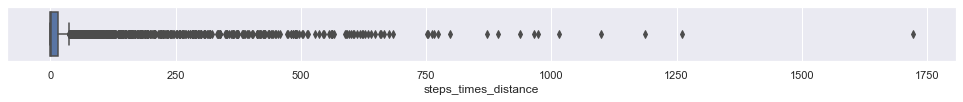

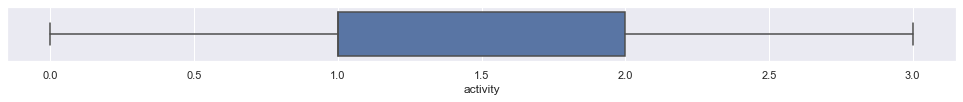

In [106]:
for column in df_apple_watch:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_apple_watch, x=column)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'steps'}>,
        <AxesSubplot:title={'center':'heart_rate'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'entropy_heart'}>,
        <AxesSubplot:title={'center':'entropy_steps'}>,
        <AxesSubplot:title={'center':'resting_heart'}>,
        <AxesSubplot:title={'center':'corr_heart_steps'}>],
       [<AxesSubplot:title={'center':'norm_heart'}>,
        <AxesSubplot:title={'center':'intensity_karvonen'}>,
        <AxesSubplot:title={'center':'sd_norm_heart'}>,
        <AxesSubplot:title={'center':'steps_times_distance'}>],
       [<AxesSubplot:title={'center':'activity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

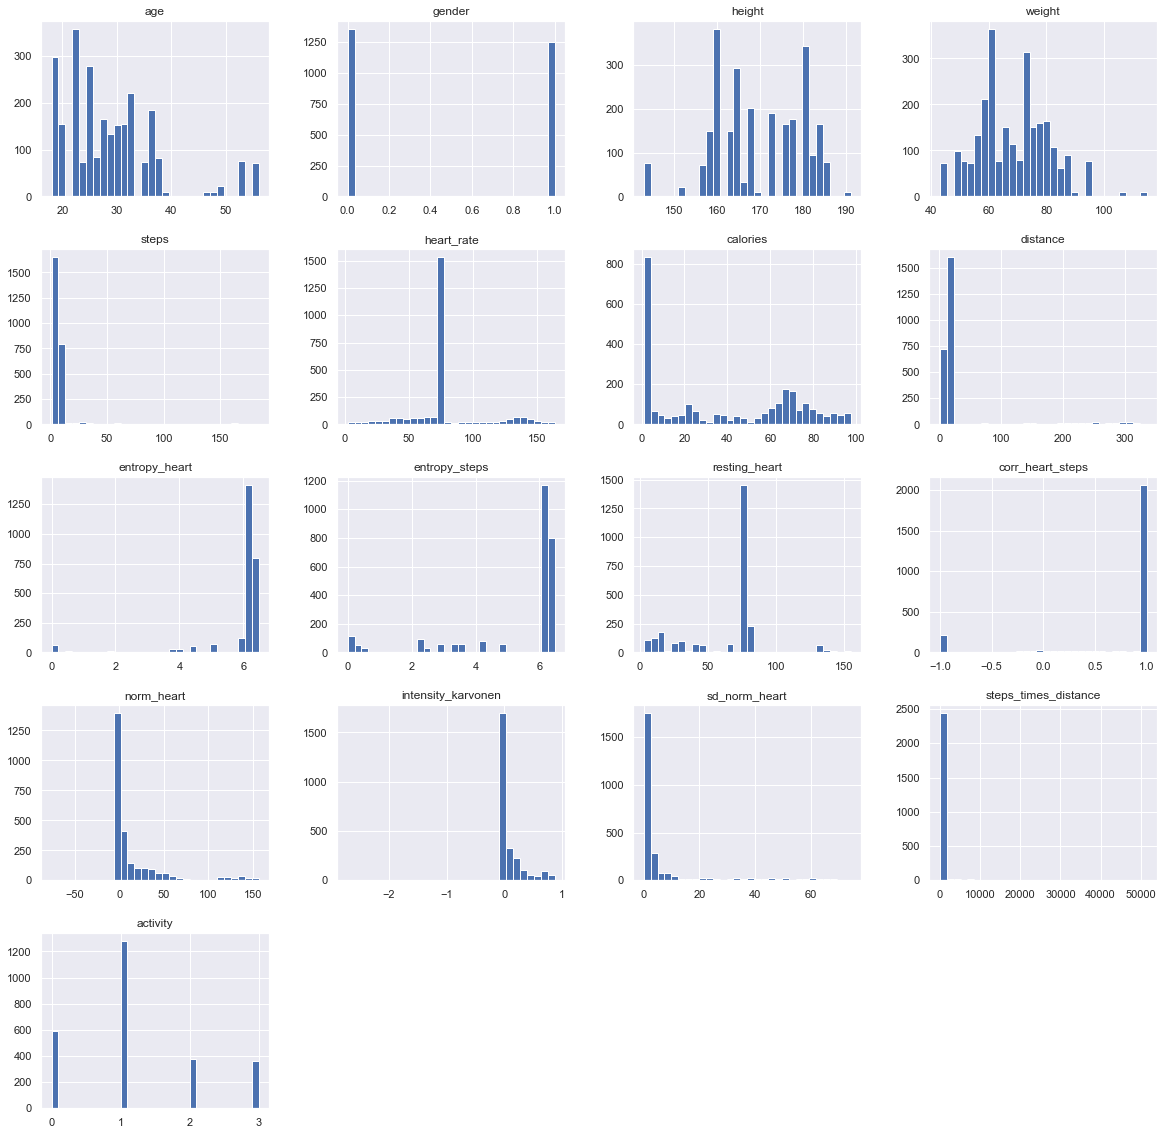

In [107]:
df_fb.hist(bins=30, figsize=(20, 20))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'steps'}>,
        <AxesSubplot:title={'center':'heart_rate'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'entropy_heart'}>,
        <AxesSubplot:title={'center':'entropy_steps'}>,
        <AxesSubplot:title={'center':'resting_heart'}>,
        <AxesSubplot:title={'center':'corr_heart_steps'}>],
       [<AxesSubplot:title={'center':'norm_heart'}>,
        <AxesSubplot:title={'center':'intensity_karvonen'}>,
        <AxesSubplot:title={'center':'sd_norm_heart'}>,
        <AxesSubplot:title={'center':'steps_times_distance'}>],
       [<AxesSubplot:title={'center':'activity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

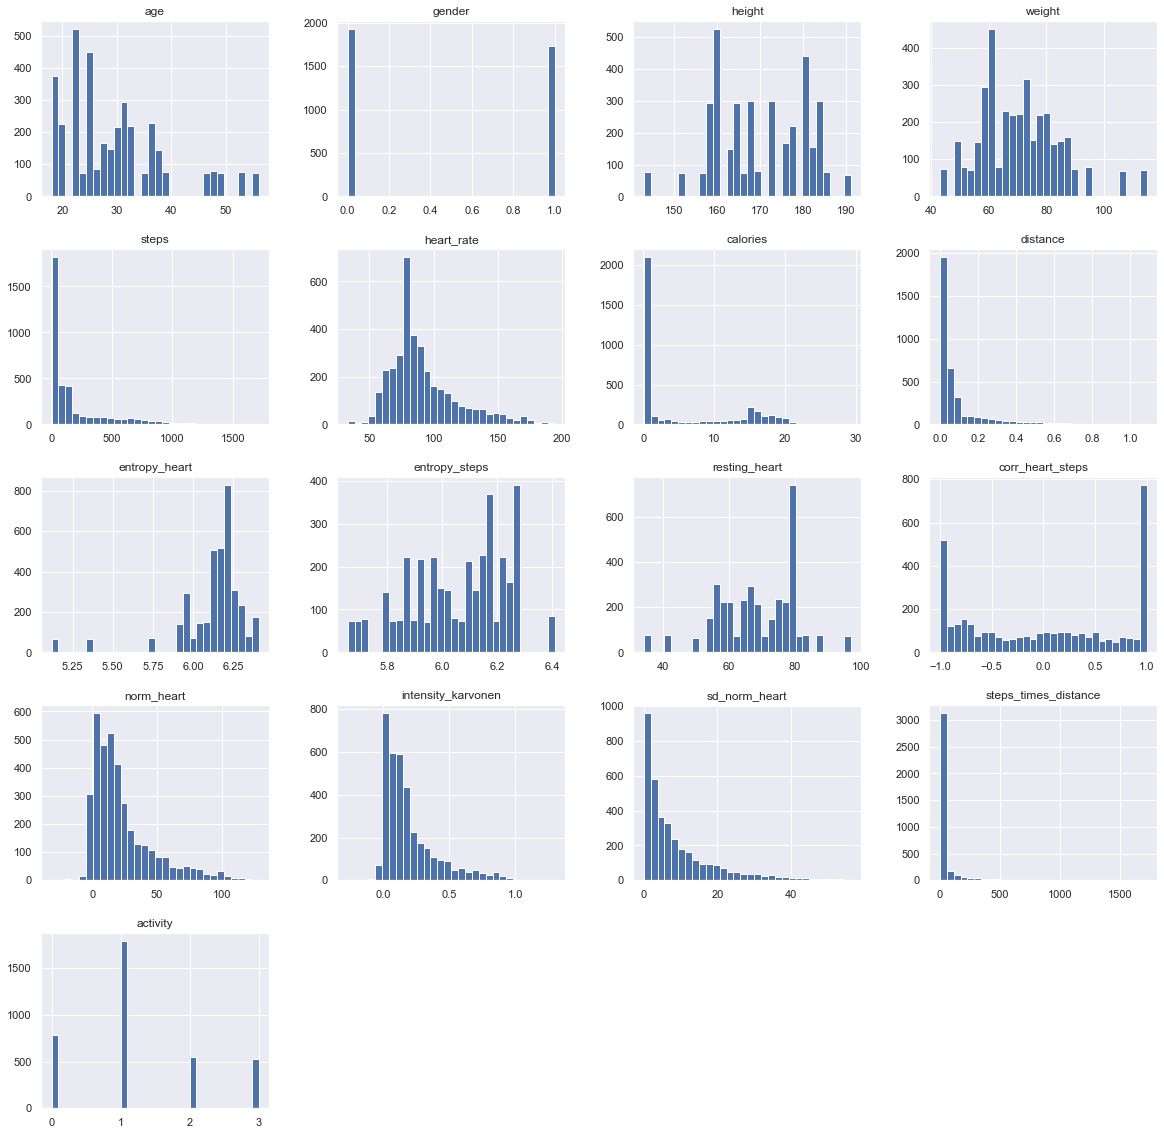

In [108]:
df_apple_watch.hist(bins=30, figsize=(20, 20))

In [ ]:
### ANOVA


In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# df_fb['activity'] = labelencoder.fit_transform(df_fb['activity'])
# df_fb

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,0
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,0
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,0
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,0
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.0,1
6260,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,1
6261,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,1
6262,46,0,157.5,71.4,1.0,35.000000,20.5,1.0,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.0,1


### Feature scores for fitbit

In [120]:
X = df_fb.drop(labels=["activity"],axis=1) # Features
y = df_fb["activity"] # Target

In [121]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [122]:
# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression,k=10) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X,y)

In [123]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))

[0.6871 0.3323 0.2078 0.0544 0.0253 0.3892 0.     0.0417 0.     0.
 0.7906 0.4636 0.5935 0.6234 0.     0.3333]
[1.62000e-01 9.40000e-01 1.58700e+00 3.70500e+00 5.01100e+00 7.42000e-01
 2.46876e+02 4.15100e+00 3.52070e+01 1.85300e+01 7.00000e-02 5.37000e-01
 2.85000e-01 2.41000e-01 2.25780e+01 9.36000e-01]


In [124]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F1_Score","P_Value"]
print(feature_score.nlargest(10,columns="F1_Score"))

          Input_Features    F1_Score  P_Value
6               calories  246.876205   0.0000
8          entropy_heart   35.207362   0.0000
14         sd_norm_heart   22.577753   0.0000
9          entropy_steps   18.529943   0.0000
4                  steps    5.011112   0.0253
7               distance    4.151226   0.0417
3                 weight    3.705185   0.0544
2                 height    1.587400   0.2078
1                 gender    0.940253   0.3323
15  steps_times_distance    0.936472   0.3333


### Feature scores for Apple watch

In [127]:
X = df_apple_watch.drop(labels=["activity"],axis=1) # Features
y = df_apple_watch["activity"] # Target
# Apply feature selection
fit = fs.fit(X,y)
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))


[7.923e-01 6.830e-01 7.395e-01 8.850e-01 1.375e-01 5.821e-01 6.000e-04
 1.007e-01 6.509e-01 8.733e-01 8.006e-01 0.000e+00 4.593e-01 2.550e-01
 0.000e+00 8.870e-02]
[6.90000e-02 1.67000e-01 1.11000e-01 2.10000e-02 2.20700e+00 3.03000e-01
 1.18490e+01 2.69600e+00 2.05000e-01 2.50000e-02 6.40000e-02 1.03472e+02
 5.48000e-01 1.29600e+00 9.66020e+01 2.89900e+00]


In [128]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F1_Score","P_Value"]
print(feature_score.nlargest(10,columns="F1_Score"))

          Input_Features    F1_Score  P_Value
11      corr_heart_steps  103.472094   0.0000
14         sd_norm_heart   96.601931   0.0000
6               calories   11.848883   0.0006
15  steps_times_distance    2.898720   0.0887
7               distance    2.695935   0.1007
4                  steps    2.206817   0.1375
13    intensity_karvonen    1.295969   0.2550
12            norm_heart    0.547685   0.4593
5             heart_rate    0.302846   0.5821
8          entropy_heart    0.204859   0.6509


### MODEL ONE 

In [26]:

df_fb1=df_fb[["steps","calories","entropy_heart","entropy_steps","sd_norm_heart","weight","activity"]] # for fitbit
df_apple_watch1=df_apple_watch[["corr_heart_steps","sd_norm_heart","calories","steps_times_distance","distance","steps","activity"]] # for Apple watch

Text(0.5, 0, 'calaories')

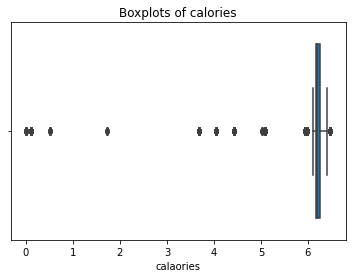

In [34]:
##### Boxplots ######

ax = sns.boxplot(x=df_fb1['entropy_heart']) # make y=data to rotate
plt.title('Boxplots of calories') # Title of chart
plt.xlabel('calaories') # x-label label
#plt.show()
#plt.close()

In [133]:
df_fb1.head()

,steps,calories,entropy_heart,entropy_setps,sd_norm_heart,weight,activity
3656,1.0,1.0,5.938588,2.179799,1.000000,65.4,0
3657,1.0,1.0,5.938588,2.179799,1.000000,65.4,0
3658,1.0,1.0,5.938588,2.179799,1.000000,65.4,0
3659,1.0,1.0,5.938588,2.179799,1.000000,65.4,0
3660,1.0,3.5,5.938588,2.179799,1.368007,65.4,3


### KNeighborsClassifier for Fitbit


In [210]:
y = df_fb1[['activity']] # target variable
X = df_fb1.drop("activity", axis=1) 

# Divide our data to a train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2022 )

# train knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 nearest neighbors

# fit our model
knn_model.fit(X_train, y_train.values.ravel()) #



KNeighborsClassifier()

In [211]:

test_accuracy = knn_model.score(X_test, y_test.values.ravel())
train_accuracy = knn_model.score(X_train, y_train.values.ravel())
print(test_accuracy)
print(train_accuracy)


0.7950191570881227
0.8451581975071908


54


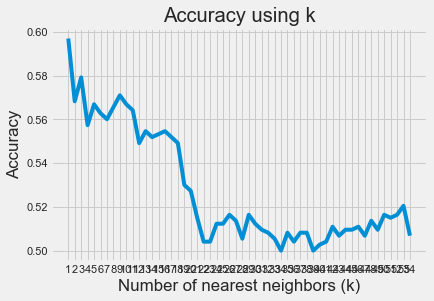

In [140]:
ideal_k = math.floor(len(X_train)**0.5)
print(ideal_k)

accuracy = [] # empty accuracy list


for k in range(1, ideal_k+1):
    knn_model = KNeighborsClassifier(n_neighbors=k)  # load our model with k nearest neighbors
    knn_model.fit(X_train, y_train.values.ravel())  # train our model on our training data
    accuracy.append(knn_model.score(X_test, y_test.values.ravel())) # look at the accuracy on our test data
    # repeat this process for the k above

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight") #style of plot. Many other styles you can find on google.
plt.plot(range(1, ideal_k+1), accuracy)
plt.xticks(range(1, ideal_k+1))
plt.title("Accuracy using k")
plt.xlabel("Number of nearest neighbors (k)")
plt.ylabel("Accuracy")
plt.show()
plt.close()


### KNN for Apple watch

In [142]:
y = df_apple_watch1[['activity']] # target variable
X = df_apple_watch1.drop("activity", axis=1) 

# Divide our data to a train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2022 )

# train knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 nearest neighbors

# fit our model
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [143]:

test_accuracy = knn_model.score(X_test, y_test.values.ravel())
train_accuracy = knn_model.score(X_train, y_train.values.ravel())
print(test_accuracy)
print(train_accuracy)

0.5669398907103825
0.7151162790697675


54


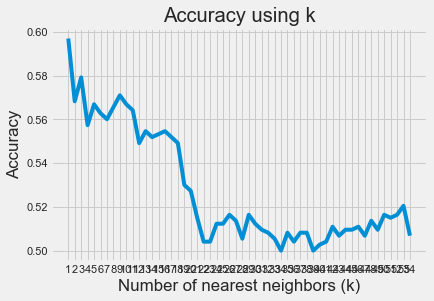

In [144]:
ideal_k = math.floor(len(X_train)**0.5)
print(ideal_k)

accuracy = []

for k in range(1, ideal_k+1):
    knn_model = KNeighborsClassifier(n_neighbors=k)  # load our model with k nearest neighbors
    knn_model.fit(X_train, y_train.values.ravel())  # train our model on our training data
    accuracy.append(knn_model.score(X_test, y_test.values.ravel())) # look at the accuracy on our test data
    # repeat this process for the k above


plt.style.use("fivethirtyeight") #style of plot. Many other styles you can find on google.
plt.plot(range(1, ideal_k+1), accuracy)
plt.xticks(range(1, ideal_k+1))
plt.title("Accuracy using k")
plt.xlabel("Number of nearest neighbors (k)")
plt.ylabel("Accuracy")
plt.show()
plt.close()

In [250]:
df_fb.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,Lying
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,Lying
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,Lying
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,Lying
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,Walking


In [145]:
y = df_fb[['activity']] # target variable
X = df_fb.drop("activity", axis=1)

In [150]:
y = df_apple_watch[['activity']] # target variable
X = df_apple_watch.drop("activity", axis=1)
scaled_apple = scaler_transform.fit_transform(X)

In [257]:
df_fb.shape

(2608, 17)

### Decision tree for fitbit

In [172]:
y1 = df_fb1[['activity']]
X1 = df_fb1.drop("activity", axis=1) 

In [173]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 2022)

# Fit Data
dtmodel = tree.DecisionTreeClassifier(random_state=2022)
loan_dt = dtmodel.fit(X_train1, y_train1)

y_predict1 = loan_dt.predict(X_test1)
print(classification_report(y_test1, y_predict1))

DT_score = accuracy_score(y_predict1,y_test1)
print(f"{round(DT_score*100,2)}% Accurate")




              precision    recall  f1-score   support

           0       0.87      0.78      0.82       120
           1       0.91      0.90      0.90       239
           2       0.65      0.78      0.71        77
           3       0.89      0.87      0.88        86

    accuracy                           0.85       522
   macro avg       0.83      0.83      0.83       522
weighted avg       0.86      0.85      0.85       522

85.06% Accurate


### Decision tree for Apple watch

In [168]:
y2 = df_apple_watch[['activity']]
X2 = df_apple_watch.drop("activity", axis=1) 

In [169]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 2022)

# Fit Data
dtmodel = tree.DecisionTreeClassifier(random_state=2022)
loan_dt = dtmodel.fit(X_train2, y_train2)

y_predict2 = loan_dt.predict(X_test2)
print(classification_report(y_test2, y_predict2))

DT_score = accuracy_score(y_predict2,y_test2)
print(f"{round(DT_score*100,2)}% Accurate")




              precision    recall  f1-score   support

           0       0.65      0.70      0.68       142
           1       0.86      0.83      0.85       362
           2       0.70      0.60      0.65       115
           3       0.68      0.79      0.73       113

    accuracy                           0.76       732
   macro avg       0.72      0.73      0.73       732
weighted avg       0.77      0.76      0.76       732

76.37% Accurate


### Random forest for fitbit

C:\Users\Xavier\AppData\Local\Temp/ipykernel_6984/1049234990.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train1, y_train1)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89       120
           1       0.93      0.97      0.95       239
           2       0.81      0.86      0.84        77
           3       0.94      0.90      0.92        86

    accuracy                           0.91       522
   macro avg       0.90      0.89      0.90       522
weighted avg       0.91      0.91      0.91       522

85.06% Accurate


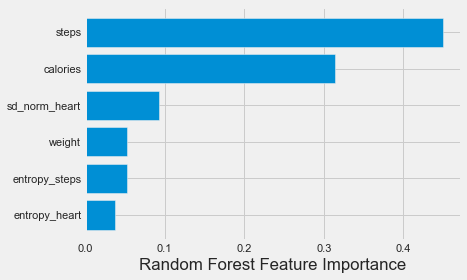

In [174]:
RF = RandomForestClassifier(random_state=2022)
RF.fit(X_train1, y_train1)

y_predict = RF.predict(X_test1)

#  prediction Summary by species
print(classification_report(y_test1, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict1,y_test1)
print(f"{round(RF_SC*100,2)}% Accurate")

##  A little bit better :)

# Check the important features

importances = RF.feature_importances_

plt.barh(X.columns, RF.feature_importances_)
# plt.show()
plt.close()

# Lets rank it for simplicity

sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### Random forest for Apple watch

In [175]:
RF = RandomForestClassifier(random_state=2022)
RF.fit(X_train2, y_train2)

y_predict = RF.predict(X_test2)

#  prediction Summary by species
print(classification_report(y_test2, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test2)
print(f"{round(RF_SC*100,2)}% Accurate")


C:\Users\Xavier\AppData\Local\Temp/ipykernel_6984/2425657695.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train2, y_train2)


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       142
           1       0.90      0.93      0.91       362
           2       0.83      0.74      0.78       115
           3       0.90      0.86      0.88       113

    accuracy                           0.87       732
   macro avg       0.86      0.84      0.85       732
weighted avg       0.87      0.87      0.87       732

87.16% Accurate


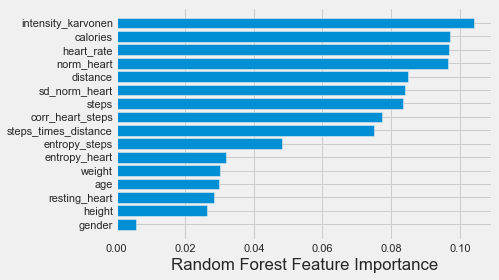

In [157]:
importances = RF.feature_importances_

plt.barh(X.columns, RF.feature_importances_)
# plt.show()
plt.close()

# Lets rank it for simplicity

sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### XGBoost for fitbit

In [179]:

#XGBoost

xgbcl_fb = XGBClassifier(random_state=2022)

xgbcl_fb.fit(X_train1,y_train1)
y_xgbcl_fb = xgbcl_fb.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl_fb,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl_fb,y_test1))



XGBoost: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.97      0.93      0.95       248
           2       0.86      0.77      0.81        86
           3       0.88      0.97      0.93        78

    accuracy                           0.91       522
   macro avg       0.89      0.90      0.89       522
weighted avg       0.91      0.91      0.91       522

XGBoost Accuracy:  0.9080459770114943


### XGBoost for Apple watch

In [180]:

#XGBoost

xgbcl_apple = XGBClassifier(random_state=2022)

xgbcl_apple.fit(X_train2,y_train2)
y_xgbcl_apple = xgbcl_apple.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl_apple,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl_apple,y_test2))



XGBoost: 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       154
           1       0.92      0.90      0.91       368
           2       0.71      0.75      0.73       110
           3       0.81      0.92      0.86       100

    accuracy                           0.86       732
   macro avg       0.82      0.84      0.83       732
weighted avg       0.86      0.86      0.86       732

XGBoost Accuracy:  0.855191256830601


In [181]:
#XGBoost tuned 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.model_selection import StratifiedKFold

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'n_estimators': [50, 65, 80, 100, 115, 130, 150,200,250,300,500,600,700,1000],
        'learning_rate': [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]
        }


xgb = XGBClassifier(n_estimators=115, objective='multi:softprob',
                    silent=True, nthread=1, random_state = 2022)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[22:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 0 minutes and 19.28 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [183]:
tunedxgbcl = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              monotone_constraints='()', n_estimators=115,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=2022, reg_alpha=1.6,objective='multi:softprob')

#Tuned XGB for Fitbit

tunedxgbcl.fit(X_train1,y_train1)
y_xgbcl_fb = tunedxgbcl.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl_fb,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl_fb,y_test1))


[22:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1

XGBoost: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       123
           1       0.96      0.87      0.91       263
           2       0.69      0.82      0.75        65
           3       0.74      0.90      0.82        71

    accuracy                           0.86       522
   macro avg       0.81      0.86      0.83       522
weighted avg       0.87      0.86      0.86       522

XGBoost Accuracy:  0.8601532567049809


In [184]:
#Tuned XGB for Apple watch

tunedxgbcl.fit(X_train2,y_train2)
y_xgbcl_aw = tunedxgbcl.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl_aw,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl_aw,y_test2))

[22:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1

XGBoost: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58       142
           1       0.90      0.75      0.82       435
           2       0.40      0.67      0.50        69
           3       0.58      0.77      0.66        86

    accuracy                           0.71       732
   macro avg       0.62      0.69      0.64       732
weighted avg       0.75      0.71      0.72       732

XGBoost Accuracy:  0.7103825136612022


In [186]:
import xgboost
xgb_model = xgboost.XGBClassifier(num_class=4,
                                  learning_rate=0.5,
                                  num_iterations=1000,
                                  max_depth=8,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss')

In [188]:
hr_pred_fb = xgb_model.fit(X_train1, y_train1).predict(X_test1)
print("Classification report for Fitbit\n",classification_report(y_test1, hr_pred_fb))


[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "boosting", "feature_fraction", "metric", "num_iterations", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Classification report for Fitbit
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       120
           1       0.93      0.95      0.94       239
           2       0.77      0.84      0.81        77
           3       0.97      0.88      0.93        86

    accuracy                           0.91       522
   macro avg       0.90      0.89      0.89       522
weighted avg       0.91      0.91      0.91       522



In [189]:
hr_pred_aw = xgb_model.fit(X_train2, y_train2).predict(X_test2)
print("Classification report for Fitbit\n",classification_report(y_test2, hr_pred_aw))


[22:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "boosting", "feature_fraction", "metric", "num_iterations", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Classification report for Fitbit
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       142
           1       0.91      0.92      0.92       362
           2       0.80      0.71      0.76       115
           3       0.88      0.87      0.87       113

    accuracy                           0.86       732
   macro avg       0.84      0.83      0.84       732
weighted avg       0.86      0.86      0.86       732



### Histogram for Fitbit

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'steps'}>,
        <AxesSubplot:title={'center':'heart_rate'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'entropy_heart'}>,
        <AxesSubplot:title={'center':'entropy_steps'}>,
        <AxesSubplot:title={'center':'resting_heart'}>,
        <AxesSubplot:title={'center':'corr_heart_steps'}>],
       [<AxesSubplot:title={'center':'norm_heart'}>,
        <AxesSubplot:title={'center':'intensity_karvonen'}>,
        <AxesSubplot:title={'center':'sd_norm_heart'}>,
        <AxesSubplot:title={'center':'steps_times_distance'}>],
       [<AxesSubplot:title={'center':'activity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

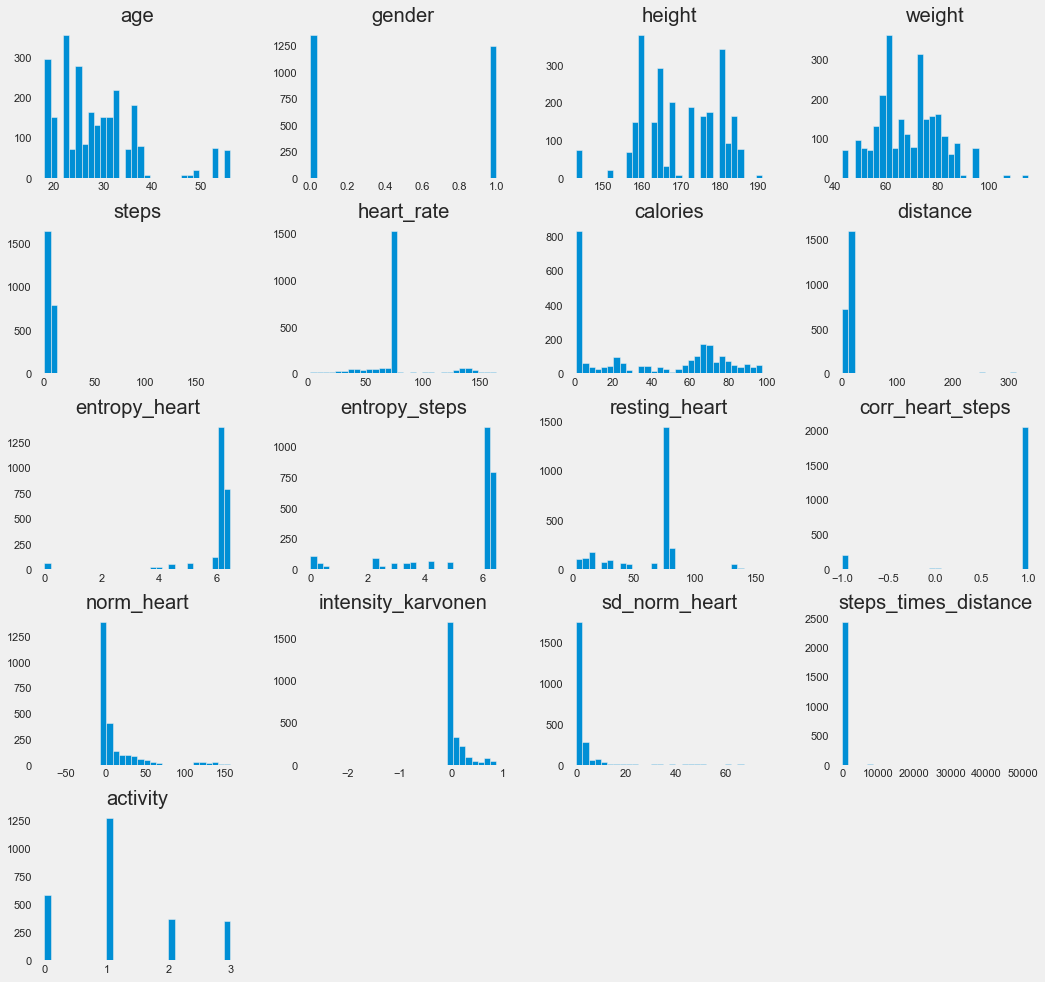

In [203]:
df_fb.hist(grid=False,
       figsize=(16, 16),
       bins=30)

In [204]:
df_fb.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,1.417051,2.117468
gender,0.076788,-1.995635
height,-0.280969,-0.567013
weight,0.348370,0.180969
steps,5.212163,27.274130
heart_rate,0.582094,1.185424
calories,0.152266,-1.583931
distance,3.093710,8.355458
entropy_heart,-4.113420,16.965251
entropy_steps,-1.813146,1.963815


In [205]:
df_fb.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,0
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,0
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,0
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,0
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,3


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'steps'}>,
        <AxesSubplot:title={'center':'heart_rate'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'entropy_heart'}>,
        <AxesSubplot:title={'center':'entropy_steps'}>,
        <AxesSubplot:title={'center':'resting_heart'}>,
        <AxesSubplot:title={'center':'corr_heart_steps'}>],
       [<AxesSubplot:title={'center':'norm_heart'}>,
        <AxesSubplot:title={'center':'intensity_karvonen'}>,
        <AxesSubplot:title={'center':'sd_norm_heart'}>,
        <AxesSubplot:title={'center':'steps_times_distance'}>],
       [<AxesSubplot:title={'center':'activity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

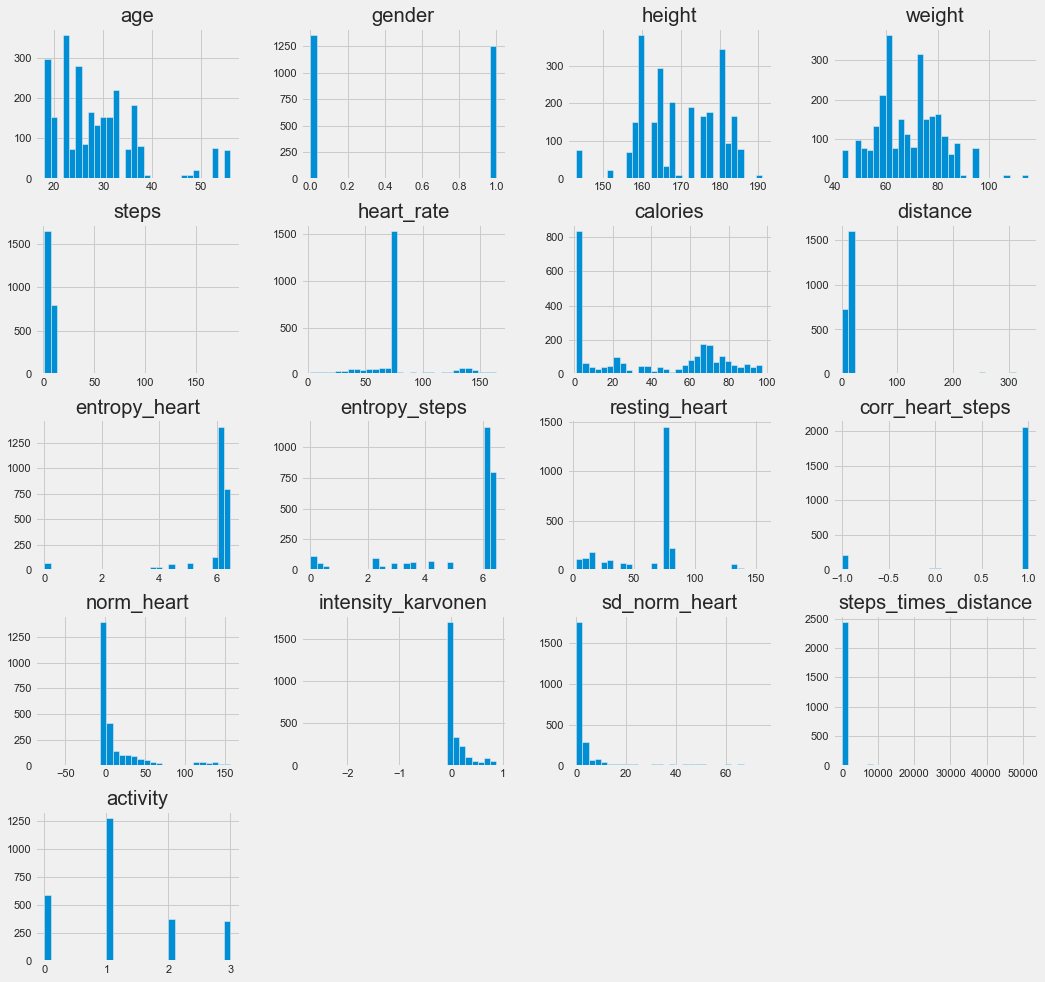

In [200]:
df_fb.hist(bins=30, figsize=(16, 16))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'steps'}>,
        <AxesSubplot:title={'center':'heart_rate'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'entropy_heart'}>,
        <AxesSubplot:title={'center':'entropy_steps'}>,
        <AxesSubplot:title={'center':'resting_heart'}>,
        <AxesSubplot:title={'center':'corr_heart_steps'}>],
       [<AxesSubplot:title={'center':'norm_heart'}>,
        <AxesSubplot:title={'center':'intensity_karvonen'}>,
        <AxesSubplot:title={'center':'sd_norm_heart'}>,
        <AxesSubplot:title={'center':'steps_times_distance'}>],
       [<AxesSubplot:title={'center':'activity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

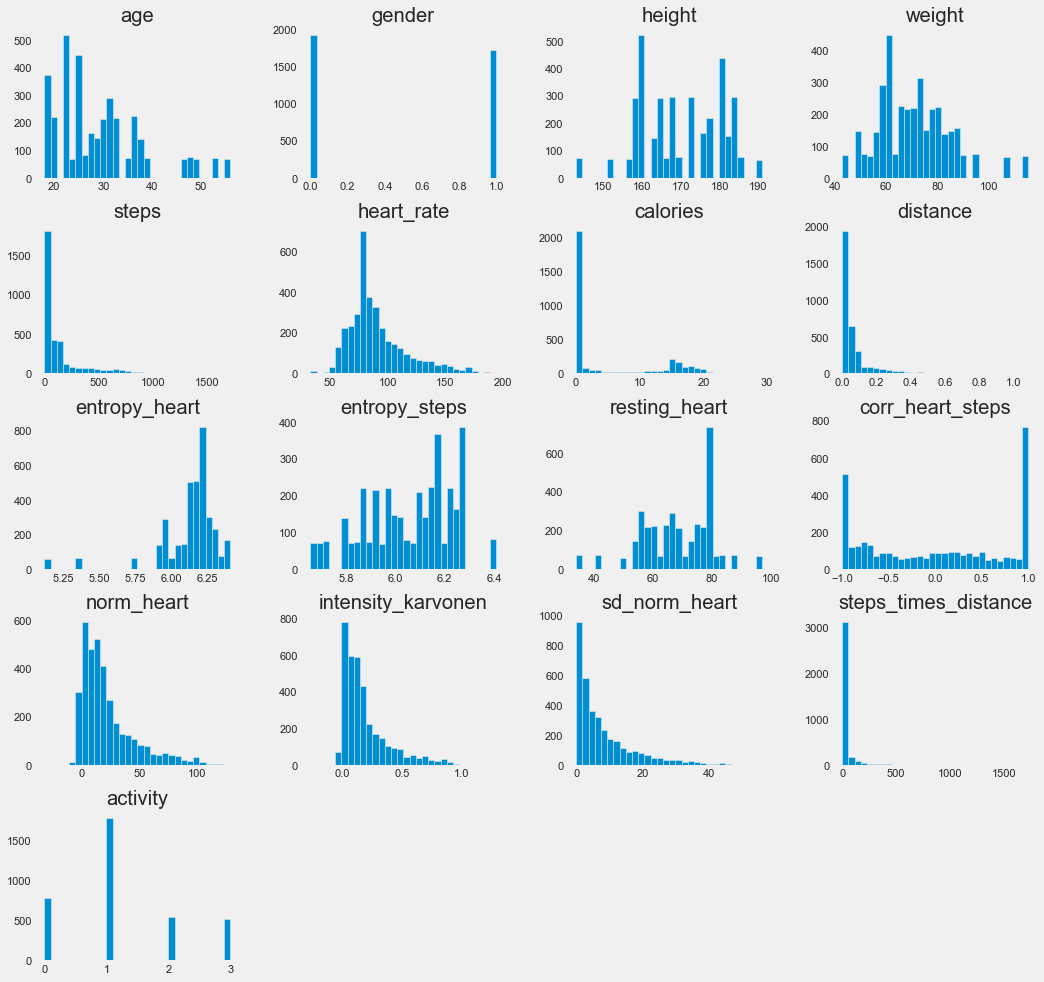

In [191]:
df_apple_watch.hist(grid=False,
       figsize=(16, 16),
       bins=30)

In [192]:
df_apple_watch.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,1.134368,0.900021
gender,0.106320,-1.989785
height,-0.162055,-0.726385
weight,0.696429,0.784334
steps,2.095332,4.338209
heart_rate,1.193837,1.326542
calories,0.887474,-0.863203
distance,2.748275,8.432657
entropy_heart,-2.588760,8.608124
entropy_steps,-0.363325,-0.676829


## Hold out cross validation

### KNN after transformation

In [353]:
y = df_fb[['activity']] # target variable
X = df_fb.drop("activity", axis=1) # variables used to predict gender, our independent variables

# Divide our data to a train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2022 )

# train knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5) # start with 5 nearest neighbors

# fit our model
knn_model.fit(X_train, y_train.values.ravel()) #

KNeighborsClassifier()

In [354]:
# Check accuracy of our model ON OUR TEST DATA!:
accuracy = knn_model.score(X_test, y_test.values.ravel())
notthebestwaytolookataccuracy = knn_model.score(X_train, y_train.values.ravel())
print(accuracy)
print(notthebestwaytolookataccuracy) # this will likely be high because you TRAINED your data on this exact data. so it should do better



0.8180076628352491
0.87392138063279


### Decision tree after transformation

In [355]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)

# Fit Data
dtmodel = tree.DecisionTreeClassifier(random_state=2022)
loan_dt = dtmodel.fit(X_train, y_train)

y_predict = loan_dt.predict(X_test)
print(classification_report(y_test, y_predict))

DT_score = accuracy_score(y_predict,y_test)
print(f"{round(DT_score*100,2)}% Accurate")



              precision    recall  f1-score   support

           0       0.87      0.85      0.86       120
           1       0.92      0.91      0.91       239
           2       0.75      0.81      0.77        77
           3       0.88      0.86      0.87        86

    accuracy                           0.87       522
   macro avg       0.85      0.86      0.86       522
weighted avg       0.88      0.87      0.87       522

87.36% Accurate


### XGBoost after transformation

In [379]:

#XGBoost

xgbcl = XGBClassifier(random_state=2022)

xgbcl.fit(X_train,y_train)
y_xgbcl = xgbcl.predict(X_test)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test))


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




XGBoost: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.97      0.90      0.93       256
           2       0.81      0.84      0.82        74
           3       0.85      0.99      0.91        74

    accuracy                           0.90       522
   macro avg       0.88      0.91      0.89       522
weighted avg       0.91      0.90      0.90       522

XGBoost Accuracy:  0.9042145593869731


In [383]:
import xgboost
xgb_model = xgboost.XGBClassifier(num_class=4,
                                  learning_rate=0.5,
                                  num_iterations=1000,
                                  max_depth=8,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss')

In [384]:
hr_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, hr_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       120
           1       0.93      0.95      0.94       239
           2       0.76      0.84      0.80        77
           3       0.99      0.90      0.94        86

    accuracy                           0.91       522
   macro avg       0.90      0.89      0.89       522
weighted avg       0.91      0.91      0.91       522



### XGbBoost try for k folds

In [237]:
X_train.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
3098,49,0,152.0,48.6,272.250000,63.211538,0.206600,0.164590,6.142147,5.787845,60.846154,-0.621868,2.365385,0.021473,16.953575,44.809627
1296,36,0,157.5,53.6,8.583459,81.043786,24.661816,0.004406,6.008680,6.103885,78.823447,-0.917932,2.220339,0.021111,0.560201,0.037816
2472,56,1,164.0,62.0,113.400000,91.151130,0.287333,0.069266,5.745907,5.909440,65.000000,-0.868422,26.151130,0.264153,4.124976,7.854764
981,19,1,183.0,65.7,10.330519,64.428571,0.206600,0.007969,6.303781,6.278464,34.153846,0.928191,30.274725,0.181453,3.791122,0.082328
1302,36,0,157.5,53.6,8.827586,82.153955,28.001034,0.003910,6.008680,6.103885,78.823447,0.963420,3.330508,0.031666,0.560201,0.034519


#### For Fitbit

In [238]:
y=df_fb1[['activity']] # target variable
X=df_fb1.drop("activity", axis=1)



In [239]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33)
print(X_train1.shape)
print(X_test1.shape)


xgbcl = XGBClassifier(random_state=2022)

xgbcl.fit(X_train1,y_train1)
y_xgbcl = xgbcl.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test1))



(1747, 6)
(861, 6)

XGBoost: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       213
           1       0.95      0.92      0.94       413
           2       0.85      0.85      0.85       116
           3       0.87      0.92      0.89       119

    accuracy                           0.90       861
   macro avg       0.88      0.89      0.89       861
weighted avg       0.90      0.90      0.90       861

XGBoost Accuracy:  0.9012775842044135


In [240]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.model_selection import StratifiedKFold

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'n_estimators': [50, 65, 80, 100, 115, 130, 150,200,250,300,500,600,700,1000],
        'learning_rate': [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]
        }


xgb = XGBClassifier(n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state = 2022)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 0 minutes and 12.56 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [241]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train1,y_train1)
y_xgbcl = tunedxgbcl.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test1))

[23:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       219
           1       0.95      0.88      0.91       436
           2       0.70      0.80      0.75       103
           3       0.73      0.88      0.80       103

    accuracy                           0.86       861
   macro avg       0.81      0.85      0.83       861
weighted avg       0.87      0.86      0.86       861

XGBoost Accuracy:  0.859465737514518


In [242]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 0 minutes and 27.23 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [243]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train1,y_train1)
y_xgbcl = tunedxgbcl.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test1))

[23:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       219
           1       0.95      0.88      0.91       436
           2       0.70      0.80      0.75       103
           3       0.73      0.88      0.80       103

    accuracy                           0.86       861
   macro avg       0.81      0.85      0.83       861
weighted avg       0.87      0.86      0.86       861

XGBoost Accuracy:  0.859465737514518


In [244]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 1 minutes and 1.99 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              missi

In [245]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train1,y_train1)
y_xgbcl = tunedxgbcl.predict(X_test1)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test1))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test1))

[23:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       219
           1       0.95      0.88      0.91       436
           2       0.70      0.80      0.75       103
           3       0.73      0.88      0.80       103

    accuracy                           0.86       861
   macro avg       0.81      0.85      0.83       861
weighted avg       0.87      0.86      0.86       861

XGBoost Accuracy:  0.859465737514518


#### For Apple watch

In [246]:
y=df_apple_watch[['activity']] 
X=df_apple_watch.drop("activity", axis=1)

In [247]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33)
print(X_train2.shape)
print(X_test2.shape)


xgbcl = XGBClassifier(random_state=2022)

xgbcl.fit(X_train2,y_train2)
y_xgbcl = xgbcl.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test2))



(2449, 16)
(1207, 16)

XGBoost: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       249
           1       0.93      0.89      0.91       621
           2       0.71      0.79      0.75       169
           3       0.81      0.82      0.82       168

    accuracy                           0.85      1207
   macro avg       0.80      0.82      0.81      1207
weighted avg       0.85      0.85      0.85      1207

XGBoost Accuracy:  0.8450704225352113


In [248]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.model_selection import StratifiedKFold

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'n_estimators': [50, 65, 80, 100, 115, 130, 150,200,250,300,500,600,700,1000],
        'learning_rate': [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]
        }


xgb = XGBClassifier(n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state = 2022)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 1 minutes and 20.11 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [249]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train2,y_train2)
y_xgbcl = tunedxgbcl.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test2))

[23:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.49      0.62      0.55       202
           1       0.89      0.70      0.78       754
           2       0.29      0.53      0.37       102
           3       0.52      0.59      0.55       149

    accuracy                           0.66      1207
   macro avg       0.55      0.61      0.56      1207
weighted avg       0.73      0.66      0.68      1207

XGBoost Accuracy:  0.6578293289146645


In [250]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 2 minutes and 32.73 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [251]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train2,y_train2)
y_xgbcl = tunedxgbcl.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test2))

[23:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.49      0.62      0.55       202
           1       0.89      0.70      0.78       754
           2       0.29      0.53      0.37       102
           3       0.52      0.59      0.55       149

    accuracy                           0.66      1207
   macro avg       0.55      0.61      0.56      1207
weighted avg       0.73      0.66      0.68      1207

XGBoost Accuracy:  0.6578293289146645


In [252]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2022)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


# print('\n All results:')
# print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)



Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\Xavier\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[23:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 5 minutes and 33.99 seconds.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=6.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
              miss

In [253]:
tunedxgbcl = XGBClassifier(colsample_bytree=0.6, gamma=6.4, learning_rate=0.5, max_depth=8,
              min_child_weight=5, n_estimators=115, nthread=1,
              objective='multi:softprob', random_state=2022, reg_alpha=1.6,
              reg_lambda=3.2, silent=True, subsample=0.6)


tunedxgbcl.fit(X_train2,y_train2)
y_xgbcl = tunedxgbcl.predict(X_test2)


print("\nXGBoost: \n", classification_report(y_xgbcl,y_test2))
print("XGBoost Accuracy: ", accuracy_score(y_xgbcl,y_test2))

[23:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost: 
               precision    recall  f1-score   support

           0       0.49      0.62      0.55       202
           1       0.89      0.70      0.78       754
           2       0.29      0.53      0.37       102
           3       0.52      0.59      0.55       149

    accuracy                           0.66      1207
   macro avg       0.55      0.61      0.56      1207
weighted avg       0.73      0.66      0.68      1207

XGBoost Accuracy:  0.6578293289146645
